# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# Assigning the csv file to the dataframe 'df'
df = pd.read_csv('ab_data.csv')

#Using .head(2) to view the first two rows in the file
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df['user_id'].count()

294478

**c.** The number of unique users in the dataset.

In [4]:
# Using len() will count our unique entries

len(df['user_id'].unique())

290584

**d.** The proportion of users converted.

In [5]:
# Total num of rows where 'converted' = 1 / length of entire data frame

len(df.query('converted == 1')) / len(df['converted'])

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
len(df.query('group == "treatment" & landing_page != "new_page"'))

1965

**f.** Do any of the rows have missing values?

In [7]:
df.isnull().sum().sum()

0

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
good_control = df.query('group == "control" & landing_page == "old_page"')
good_treatment = df.query('group == "treatment" & landing_page == "new_page"')

# Assigning the correct row info to dataframe 'frames'
frames = [good_control, good_treatment]

# Creating our new dataframe 'df2' consisting of the good rows from 'frames'
df2 = pd.concat(frames)

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2["user_id"].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [12]:
# This will display any/all entries that match user ID 773192

df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id via index num
df2 = df2.drop(index = 1899)

# Check again if the row with a duplicate user_id is deleted or not
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [14]:
# Getting the avg (probability) of users that are converted vs the entire list

p_population = (df2['converted'] == 1).mean()

p_population

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#Creating 'control_rate', which will display the avg of users converted in the 'control' group

control_rate = len(df2.query('group == "control" & converted == 1')) / len(df2.query('group == "control"'))

control_rate

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#Creating 'control_rate', which will display the avg of users converted in the 'treatment' group

treatment_rate = len(df2.query('group == "treatment" & converted == 1')) / len(df2.query('group == "treatment"'))

treatment_rate

0.11880806551510564

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = control_rate - treatment_rate

obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
#Finding the avg of users that have the new page

(df2['landing_page'] == 'new_page').mean()

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>Per the above calculations, the control group has a very slightly higher conversion rate than the treatment group. The control group has a converted percentage of **12.04%**, while treatment group percentage is **11.89%**. <br>

> Even though the control group technically has a higher percentage of converted peoples, I am not sure it is significant enough to prove effectiveness 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

> **$H_0$**: if $p_{val} \lt$ 5% : $p_{old}$ $\ge$ $p_{new}$ <br>
> **$H_1$**: if $p_{val} \ge$ 5% : $p_{old} \lt p_{new}$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
# Assuming that pNew = pOld = pPopulation, this is just the mean of converted users 

p_new = df2.converted.mean()

p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
# Assuming that pNew = pOld = pPopulation, this is just the mean of converted users

p_old = df2.converted.mean()

p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [21]:
#Count of users with the new page

n_new = len(df2.query('landing_page == "new_page"'))

n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
#Count of users with the old page

n_old = len(df2.query('landing_page == "old_page"'))

n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, size = n_new, p = [p_new, 1 - p_new] )

new_page_converted.mean()

0.88168054504163518

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(2, size = n_old, p = [p_old, 1-p_old])

old_page_converted.mean()

0.88005424232828999

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
new_page_converted.mean() - old_page_converted.mean()

0.0016263027133451846


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [31]:
# Sampling distribution 
## Assigning blank arrays to below dataframes for our simulation
p_diffs, new_page_converted, old_page_converted = [], [], []

### Loop thru 10000 iterations, appending the previously created arrays with our simulation values
for _ in range(10000):
    sample_new = np.random.choice(2, size = n_new, p = [p_new, 1-p_new])
    new_page_converted.append(sample_new.mean())
    sample_old = np.random.choice(2, size = n_old, p = [p_old, 1-p_old])
    old_page_converted.append(sample_old.mean())
    p_diffs.append(sample_new.mean() - sample_old.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

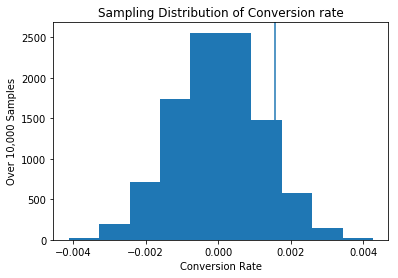

In [27]:
# Plotting histogram with p_diffs. First will convert to a numpy array so that the plotting will work

p_diffs = np.array(p_diffs)

plt.hist(p_diffs)
plt.axvline(obs_diff)
plt.title('Sampling Distribution of Conversion rate')
plt.xlabel('Conversion Rate') 
plt.ylabel('Over 10,000 Samples');


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
## Comparing the p_diffs array to the actual difference in df2

actual_diffs = df2.query('landing_page == "new_page"').converted.mean() - df2.query('landing_page == "old_page"').converted.mean()

(p_diffs > actual_diffs).mean()

0.90239999999999998

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

> We converted the difference between the actual data set (actual_diffs), and our simulated observational data set (p_diffs), in terms of conversion rate. The difference in means between these values is the p value. In this case it is .905 <br><br>
> The calculated p value of .905 exceeds our calculated type 1 error rate of .05 <br><br>
> Since this is true, we cannot reject the null hypothesis and should not assume that the new page is more effective than the old page



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" & converted == 1').count()[0]

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page" & converted == 1').count()[0]

# number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"').count()[1]

# number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"').count()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org


In [36]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative ='larger')
print(z_score, p_value)

"""
Z-test ref:
https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

"""

1.31092419842 0.094941687241


'\nZ-test ref:\nhttps://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html\n\n'

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

> Since our alternative hypothesis defines $H_1$ as $(p_{new} > p_{old})$, this is a right-tailed test. We are looking to compare our z-score at 1.311 to the right tailed $Z_{\alpha}$ critical value at 95% confidence interval. This value is 1.645. 1.311 < 1.645, so this falls within the 95% confidence interval. We fail to reject the null hypothesis, since the old page converted more users than the new page. <br>

> Our p-values are different between our two tests. This is because we were previously assumming that $(p_{new} = p_{old})$. This is not true however, we know that the old page converts more users than the new page. 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>Logistic regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [37]:
# Add intercept with '1' in each column
df2['intercept'] = 1

#create dummy variables from 'group'
df2[['ab_page', 'treatment']] = pd.get_dummies(df2['group'])

#drop 'treatment'
df2 = df2.drop('treatment', 1)

#verify above worked. 

df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0,1,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0,1,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0,1,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,1,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [38]:
reg_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()

print(reg_model.summary2())

"""
Logit with statsmodels from: https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

"""

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-18 03:15 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374



'\nLogit with statsmodels from: https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/\n\n'

In [39]:
# Convert coefficient with numpy exponential function

np.exp(0.0150)

1.0151130646157189

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

>**Answer:** Based on our previous testing, the conversion coefficient is 1.015. This means there is about an equal likelihood for conversion vs non conversion. Though our conversion rate is **slightly** higher than non converted, there is not enough evidence to indicate that the new page is better than the old page. 

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

>**Answer:** The p-value from our regression model is **0.19**. This is compared to our p-value of **.09** from Part II. Our p-values are different because in part II, we assummed that $p_{new}$ = $p_{old}$, which also makes the z-testing done in part II a one tailed test. Part three regression testing was considered a two-tailed test. <br>

>Additionally, the p-value of **.19** from our regression testing is larger than our error rate of **.05**. This means we cannot reject the null hypothesis, and should not assume that the new page is better than the old page


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Other factors that might influence a user to convert could be: gender or age. For example: a user may convert if the design on the new site is targeted towards their demographic. <br><br>
Considering other factors in the regression model may alter our confidence level. A disadvantage could be longer processing times, or a reduction in total computing power. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

> **Answer**: Per the conversion rate by country: CA: (0.11531829781364232), UK (0.12059448568984076), US (0.1195468006423762), there is not a correlation between country and conversion rate. All three locations boast similar conversion rates. 

 Provide the statistical output as well as a written response to answer this question.

In [40]:
# Read the countries.csv
df3 = pd.read_csv('countries.csv')
df3.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [41]:
# Join with the df2 dataframe. Using the index 'key' to match records from df3 to df2. 

df_merged = df2.join(df3.set_index('user_id'), on="user_id")

df_merged.head(2)

"""
Ref: join
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
"""

'\nRef: join\nhttps://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html\n'

In [42]:
# Create the necessary dummy variables

df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])

## Drop country column
df_merged = df_merged.drop('country', 1)

In [43]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,0,1


In [44]:
# Conversion rate for each country in order: CA, UK, US

df_merged.query('CA == 1').converted.mean(), df_merged.query('UK ==1').converted.mean(), df_merged.query('US ==1').converted.mean()

(0.11531829781364232, 0.12059448568984076, 0.1195468006423762)

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [45]:
# Comparing the results of country vs the ab_page to see if country impacts conversion rate

df_merged['CA_ab_compare'] = df_merged['CA'] * df_merged['ab_page']
df_merged['UK_ab_compare'] = df_merged['UK'] * df_merged['ab_page']
df_merged['US_ab_compare'] = df_merged['US'] * df_merged['ab_page']


In [46]:
# Fit your model, and summarize the results
reg_model = sm.Logit(df_merged['converted'], df_merged[['intercept', 'CA_ab_compare', 'UK_ab_compare', 'US_ab_compare']]).fit()

print(reg_model.summary2())

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-18 03:16 AIC:              212784.0722
No. Observations:   290584           BIC:              212826.3908
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -2.0038   0.0081 -247.1457 0.0000 -2.0197 -1.9879
CA_ab_compare    -0.0002   0.0373   -0.0064 0.9949 -0.0734  0.0729
UK_ab_compare     0.0115   0.0181    0.6392 0.5227 -0

In [47]:
np.exp(reg_model.params)

intercept        0.134827
CA_ab_compare    0.999761
UK_ab_compare    1.011611
US_ab_compare    1.017439
dtype: float64

>**Summary** Comparing the values above, we can see that the chance of converting a user from the old page to the new page is the same across every country. There is no real difference between these 3 values ( CA : 1.0, UK : 1.01, US : 1.02) <br>

> Our P-values are: CA : 1.0, UK : .52, US : .17 . These are all larger than our confidence interval, which is .05.  <br>

> We cannot reject the null hypothesis, the new page does not convert more than the old page. Our e-commerce client should keep the old page, as the new page does not have a greater chance of converting users. 



<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0